In [1]:
from sklearn.datasets import fetch_mldata
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from scipy.cluster.hierarchy import dendrogram, linkage
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
mnist = fetch_mldata("MNIST original")
X = mnist.data / 255.0
y = mnist.target

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)


In [3]:
X.shape

(70000, 784)

PCA

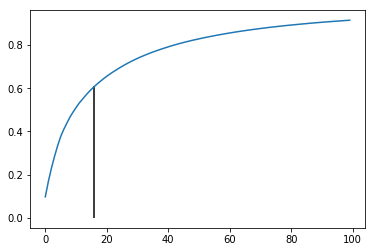

In [4]:
pca = PCA(n_components=100)
mnist_pca = pca.fit_transform(X)
cum_ratio = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(len(cum_ratio)), cum_ratio)
plt.vlines(ymin=0,ymax=cum_ratio[16],x=16)

The elbow here seems to be at about 16 components, as indicated on the plot. We'll use 16 components because it will reduce our dimenstions without sacrificing too much of the original variance. We drop 768 dimensions while maintaining about 60% of our variance.

In [5]:
pca16 = PCA(n_components=16)
mnist_pca16 = pca16.fit_transform(X)

Below we've plotted all the images by their first 2 principal components. We can see some clustering, but it certainly isn't perfect. This plot is showing us where each written number tends to fall when taking only the first 2 principal components. You can see that we've removed too much variance to get a reliable and accurate clustering.

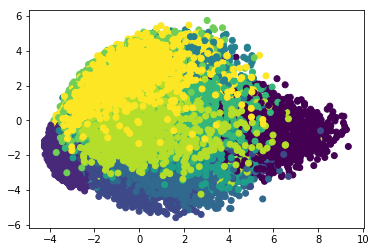

In [6]:
pca2 = PCA(n_components=2)
mnist_pca2 = pca2.fit_transform(X)
plt.scatter(mnist_pca2[:,0],mnist_pca2[:,1], c = y)

We'll now take a look at a few images in their original form vs under the PCA-16 transformation.

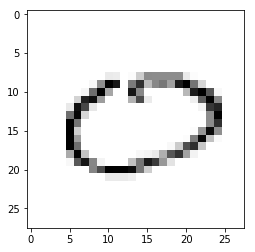

In [7]:
plt.imshow(X[30].reshape((28,28)), cmap='Greys')

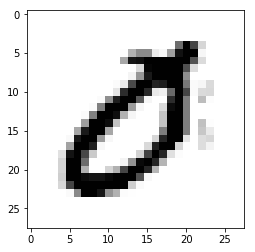

In [8]:
plt.imshow(X[60].reshape((28,28)), cmap='Greys')

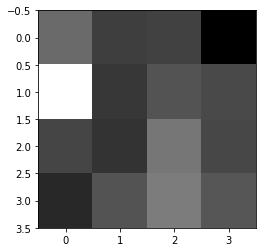

In [9]:
plt.imshow(mnist_pca16[30].reshape((4,4)), cmap = 'Greys')

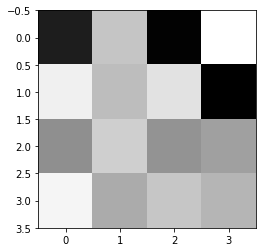

In [10]:
plt.imshow(mnist_pca16[60].reshape((4,4)), cmap = 'Greys')

You really can't get any idea of what the picture is of when reduced to the 4 x 4 size, but we're still able to extract variability that can correctly identify the number a high percentage of the time.

T-SNE

We'll take a sample of 10,000 rows from our data to run T-SNE on.

In [11]:
idx = np.random.choice(np.arange(len(X)), 10000, replace=False)
X_s = mnist_pca16[idx]
y_s = y[idx]

We'll run T-SNE with a few different sets of hyperparameters and compare the plots we end up with.

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.011s...
[t-SNE] Computed neighbors for 10000 samples in 2.929s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 1.400220
[t-SNE] KL divergence after 250 iterations with early exaggeration: 82.399246
[t-SNE] KL divergence after 1000 iterations: 1.644403


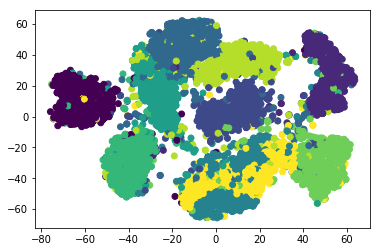

In [12]:
tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=1000, learning_rate=200)
mnist_tsne = tsne.fit_transform(X_s)
plt.scatter(mnist_tsne[:,0],mnist_tsne[:,1], c = y_s)

We can see T-SNE performs quite a bit better than the 2-component PCA did. This plot has more clearly defined clusters and less crossover.

Let's see how T-SNE does with a perplexity of 20 instead of 50.

[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.006s...
[t-SNE] Computed neighbors for 10000 samples in 2.168s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 1.128351
[t-SNE] KL divergence after 250 iterations with early exaggeration: 87.938438
[t-SNE] KL divergence after 1000 iterations: 1.810054


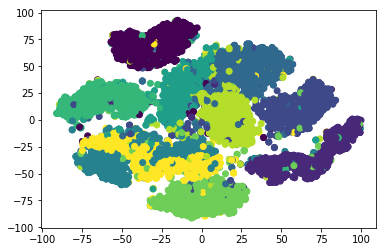

In [13]:
tsne = TSNE(n_components=2, verbose=1, perplexity=20, n_iter=1000, learning_rate=200)
mnist_tsne = tsne.fit_transform(X_s)
plt.scatter(mnist_tsne[:,0],mnist_tsne[:,1], c = y_s)

Looks like T-SNE performs pretty much the same with either one of these levels of perplexity.

We'll now change the number of iterations to 500 and the learning rate to 500 to see what changes in our plot.

[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.009s...
[t-SNE] Computed neighbors for 10000 samples in 2.149s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 1.128351
[t-SNE] KL divergence after 250 iterations with early exaggeration: 87.971817
[t-SNE] KL divergence after 500 iterations: 1.985061


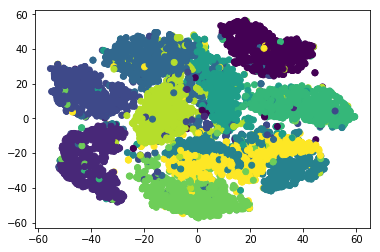

In [14]:
tsne = TSNE(n_components=2, verbose=1, perplexity=20, n_iter=500, learning_rate=500)
mnist_tsne = tsne.fit_transform(X_s)
plt.scatter(mnist_tsne[:,0],mnist_tsne[:,1], c = y_s)

The plot is less clustered with fewer iterations and a higher learning rate. It looks like the clusters cross over each more because they aren't as concentrated.

K-MEANS CLUSTERING

When doing k-means clustering, we'd usually have to figure out how to know how many clusters there are in the data. Because our data is just handwritten numbers, we know there are 10 clusters.

We'll perform our k-means clustering using the PCA dimension reduction to 2 principal components so we can plot it.

In [15]:
kmeans = KMeans(n_clusters = 10, n_jobs = -1)
kmeans.fit(mnist_pca2)
clusters = kmeans.predict(mnist_pca2)

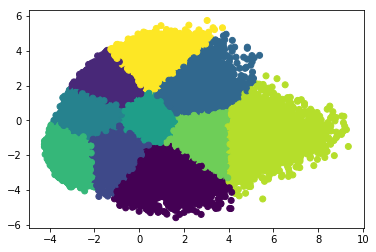

In [16]:
plt.scatter(mnist_pca2[:,0], mnist_pca2[:,1], c = clusters)

We'll evaluate our clustering using the adjusted Rand index, which just compares the predicted labels to the correct labels.

In [17]:
adjusted_rand_score(y,clusters)

0.238800180146144

As 1 is a perfect score and 0 is essentially random, .23 is not a great score.

The clustering was fairly robust; when run multiple times, the rand score did not change. This is a good sign, because it shows that the clustering is not just a function of where the random initial clusters are begun.

I did not scale the data as we are using the same "scale" already for all of our variables.

HIERARCHICAL CLUSTERING

For the sake of time, we'll take a random sample of 100 images from the dataset and just use the first 2 principle components to build our hierarchical clustering dendrograms. 

In [18]:
idx = np.random.choice(np.arange(len(X)), 100, replace=False)
X_s = mnist_pca2[idx]

We'll use three different clustering algorithms to see how robust the clustering is to different algorithms. 'Complete' clusters based on the distance between points in the clusters that are furthest apart. 'Single' clusters based on the distance between points in the clusters that are closest together. 'Average' clusters based on the average distance between all points in the clusters.

In [19]:
complete = linkage(X_s, 'complete')
single = linkage(X_s, 'single')
average = linkage(X_s, 'average')

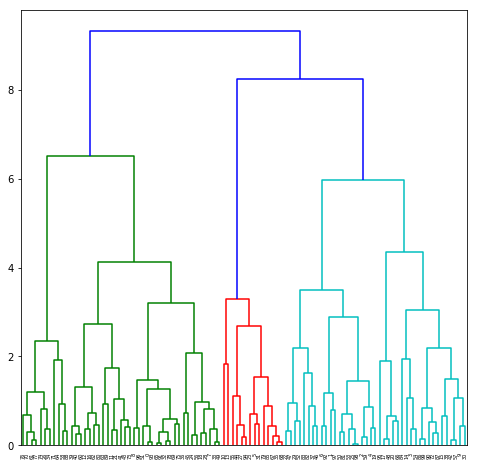

In [20]:
plt.figure(figsize=(8, 8))
d_comp = dendrogram(complete)

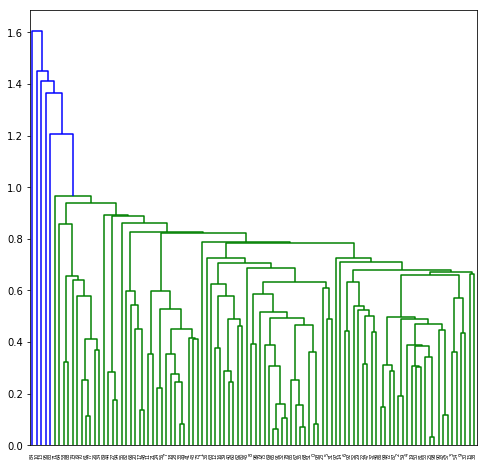

In [21]:
plt.figure(figsize=(8, 8))
d_sing = dendrogram(single)

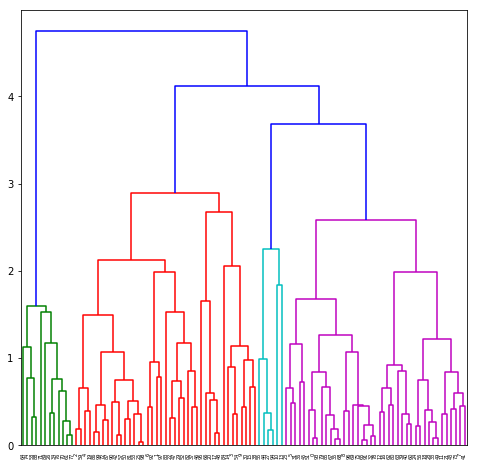

In [22]:
plt.figure(figsize=(8, 8))
d_avg = dendrogram(average)

We can see that 'complete' and 'average' create rather sensible diagrams that suggest between 7 and 12 clusters. 'Single' is very distorted and seems to be almost completely random. None of the dendrograms are particularly helpful in figuring out exactly how many clusters there are.